In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from sklearn.naive_bayes import GaussianNB
lemma = WordNetLemmatizer()

In [3]:
df = pd.read_csv(r'G:\MangeshDataScience\Practice\WorkEx\NLP\Email Spam Classification\spam_ham_dataset.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'G:\\MangeshDataScience\\Practice\\WorkEx\\Classification\\Email Spam Classification\\spam_ham_dataset.csv'

In [3]:
df.loc[:,'text'] = df.loc[:,'text'].apply(lambda x: x.lower())

In [4]:
df.loc[:,'text'] = df.loc[:,'text'].apply(lambda x: re.sub(r'@S+',"",x))

In [5]:
stoplist = stopwords.words('english')

In [6]:
punct = string.punctuation

In [7]:
df.loc[:,'text'] = df.loc[:,'text'].apply(lambda x:' '.join([lemma.lemmatize(word,'v') for word in nltk.word_tokenize(x) if word not in stoplist]))

In [8]:
df.loc[:,'text'] = df.loc[:,'text'].apply(lambda x:' '.join([lemma.lemmatize(word,'v') for word in nltk.word_tokenize(x) if word not in punct]))

In [9]:
df

,Unnamed: 0,label,text,label_num
0,605,ham,subject enron methanol meter 988291 follow not...,0
1,2349,ham,subject hpl nom january 9 2001 see attach file...,0
2,3624,ham,subject neon retreat ho ho ho around wonderful...,0
3,4685,spam,subject photoshop windows office cheap main tr...,1
4,2030,ham,subject indian spring deal book teco pvr reven...,0
...,...,...,...,...
5166,1518,ham,subject put 10 ft transport volumes decrease 2...,0
5167,404,ham,subject 3 4 2000 follow noms hpl take extra 15...,0
5168,2933,ham,subject calpine daily gas nomination julie men...,0
5169,1409,ham,subject industrial worksheets august 2000 acti...,0


In [10]:
df

,Unnamed: 0,label,text,label_num
0,605,ham,subject enron methanol meter 988291 follow not...,0
1,2349,ham,subject hpl nom january 9 2001 see attach file...,0
2,3624,ham,subject neon retreat ho ho ho around wonderful...,0
3,4685,spam,subject photoshop windows office cheap main tr...,1
4,2030,ham,subject indian spring deal book teco pvr reven...,0
...,...,...,...,...
5166,1518,ham,subject put 10 ft transport volumes decrease 2...,0
5167,404,ham,subject 3 4 2000 follow noms hpl take extra 15...,0
5168,2933,ham,subject calpine daily gas nomination julie men...,0
5169,1409,ham,subject industrial worksheets august 2000 acti...,0


In [11]:
X_train, X_test, y_train, y_test = train_test_split(df.text, df.label_num, test_size=0.25, random_state=101)

In [12]:
print(f'The shape of X_train is {X_train.shape}')
print(f'The shape of X_test is {X_test.shape}')
print(f'The response rate of y_train is {y_train.mean()}')
print(f'The response rate of y_test is {y_test.mean()}')

The shape of X_train is (3878,)
The shape of X_test is (1293,)
The response rate of y_train is 0.28803506962351727
The response rate of y_test is 0.2954369682907966


In [13]:
train_data = pd.DataFrame({'text': X_train, 'label': y_train})
test_data = pd.DataFrame({'text': X_test, 'label': y_test})

In [14]:
vectorizer = TfidfVectorizer()
train_vector = vectorizer.fit_transform(train_data['text'])
test_vector = vectorizer.transform(test_data['text'])
vectorizer.get_feature_names()

['00',
 '000',
 '0000',
 '000000',
 '000000000002858',
 '000080',
 '0001',
 '00020608',
 '0004',
 '0008',
 '001',
 '0010',
 '0012',
 '001452',
 '002',
 '0022',
 '00221',
 '0025',
 '0027',
 '0028',
 '0029',
 '00298',
 '003',
 '0030',
 '0031',
 '0038',
 '004',
 '0042',
 '0043',
 '0044',
 '0045',
 '0046',
 '0047',
 '0049',
 '005',
 '00501723',
 '0051',
 '00534580',
 '006',
 '0067',
 '007',
 '0071',
 '0074',
 '008',
 '0085201238',
 '009',
 '0090',
 '01',
 '010',
 '0100',
 '0101',
 '011',
 '0117',
 '012',
 '012603',
 '013',
 '0130',
 '014',
 '01405',
 '01408304990',
 '01474',
 '015',
 '016',
 '017',
 '0170',
 '01778',
 '0182',
 '0184',
 '019',
 '02',
 '020',
 '0200',
 '021',
 '022',
 '0232',
 '024',
 '025',
 '0255',
 '025648',
 '026',
 '027',
 '028',
 '02886',
 '029',
 '03',
 '030',
 '0300',
 '031',
 '03149',
 '0324',
 '0325567',
 '033',
 '0331',
 '034',
 '0347',
 '035',
 '0357',
 '036',
 '0361770',
 '0363',
 '036474336',
 '037',
 '0373',
 '0375',
 '038',
 '0380',
 '039',
 '0393',
 '0398',


In [15]:
classifier = GaussianNB()
classifier.fit(train_vector.toarray(), train_data.label)

GaussianNB()

In [16]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score, classification_report

In [17]:
trainX = train_vector.toarray()
trainY = train_data.label
testX = test_vector.toarray()
testY = test_data.label

In [18]:
def print_score(clf, trainX, trainY, testX, testY, train = True):
    if train:
        pred = clf.predict(trainX)
        print('Training Result:========================================================')
        print(f'The accuracy score for the model is: {accuracy_score(trainY,pred )*100: .2f}%')
        print('========================================================================')
    elif train==False:
        pred = clf.predict(testX)
        clf_report = pd.DataFrame(classification_report(testY, pred, output_dict=True))
        print('Training Result:========================================================')
        print(f'The accuracy score for the model is: {accuracy_score(testY,pred )*100: .2f}%')
        print('________________________________________________________________________')
        print(f'The classification report for the model is: \n{clf_report}')
        print('________________________________________________________________________')
        plot_confusion_matrix(clf, testX, testY, cmap='cividis')
plt.show()

Training Result:========================================================
The accuracy score for the model is:  98.68%
Training Result:========================================================
The accuracy score for the model is:  95.82%
________________________________________________________________________
The classification report for the model is: 
                    0           1  accuracy    macro avg  weighted avg
precision    0.971397    0.927083  0.958237     0.949240      0.958305
recall       0.969265    0.931937  0.958237     0.950601      0.958237
f1-score     0.970330    0.929504  0.958237     0.949917      0.958268
support    911.000000  382.000000  0.958237  1293.000000   1293.000000
________________________________________________________________________


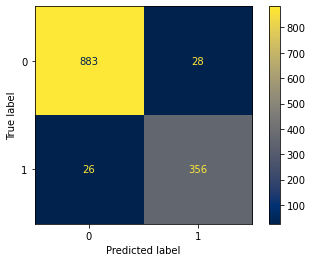

In [19]:
print_score(classifier, trainX, trainY, testX, testY, train = True)
print_score(classifier, trainX, trainY, testX, testY, train = False)

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
classifier3 = RandomForestClassifier()

In [22]:
classifier3.fit(train_vector.toarray(), train_data.label)

RandomForestClassifier()

Training Result:========================================================
The accuracy score for the model is:  100.00%
Training Result:========================================================
The accuracy score for the model is:  97.14%
________________________________________________________________________
The classification report for the model is: 
                    0           1  accuracy    macro avg  weighted avg
precision    0.978118    0.955145  0.971384     0.966632      0.971331
recall       0.981339    0.947644  0.971384     0.964492      0.971384
f1-score     0.979726    0.951380  0.971384     0.965553      0.971351
support    911.000000  382.000000  0.971384  1293.000000   1293.000000
________________________________________________________________________


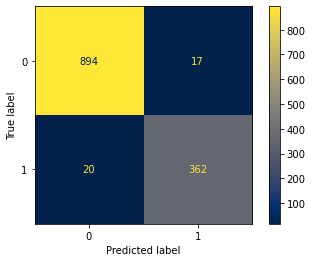

In [23]:
print_score(classifier3, train_vector.toarray(), train_data.label, test_vector.toarray(), test_data.label, train = True)
print_score(classifier3, train_vector.toarray(), train_data.label, test_vector.toarray(), test_data.label, train = False)

In [24]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [25]:
dtree.fit(train_vector.toarray(), train_data.label)

DecisionTreeClassifier()

Training Result:========================================================
The accuracy score for the model is:  100.00%
Training Result:========================================================
The accuracy score for the model is:  94.51%
________________________________________________________________________
The classification report for the model is: 
                    0           1  accuracy    macro avg  weighted avg
precision    0.957516    0.914667  0.945089     0.936092      0.944857
recall       0.964874    0.897906  0.945089     0.931390      0.945089
f1-score     0.961181    0.906209  0.945089     0.933695      0.944940
support    911.000000  382.000000  0.945089  1293.000000   1293.000000
________________________________________________________________________


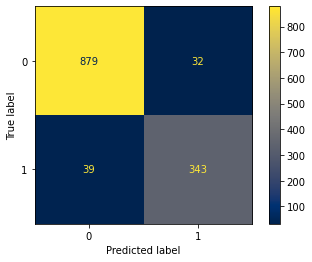

In [26]:
print_score(dtree, train_vector.toarray(), train_data.label, test_vector.toarray(), test_data.label, train=True)
print_score(dtree, train_vector.toarray(), train_data.label, test_vector.toarray(), test_data.label, train=False)

In [27]:
from sklearn.svm import SVC
classifier4 = SVC()
classifier4.fit(train_vector.toarray(), train_data.label)

SVC()

Training Result:========================================================
The accuracy score for the model is:  100.00%
Training Result:========================================================
The accuracy score for the model is:  99.15%
________________________________________________________________________
The classification report for the model is: 
                    0           1  accuracy    macro avg  weighted avg
precision    0.998891    0.974425  0.991493     0.986658      0.991663
recall       0.989023    0.997382  0.991493     0.993203      0.991493
f1-score     0.993933    0.985770  0.991493     0.989851      0.991521
support    911.000000  382.000000  0.991493  1293.000000   1293.000000
________________________________________________________________________


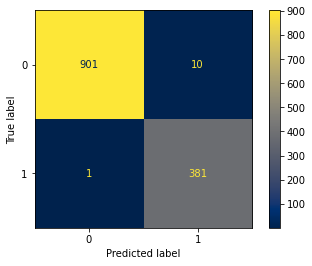

In [28]:
print_score(classifier4, train_vector.toarray(), train_data.label, test_vector.toarray(), test_data.label, train=True)
print_score(classifier4, train_vector.toarray(), train_data.label, test_vector.toarray(), test_data.label, train=False)

In [29]:
classifier8 = LogisticRegression()
classifier8.fit(train_vector.toarray(), train_data.label)

LogisticRegression()

Training Result:========================================================
The accuracy score for the model is:  99.48%
Training Result:========================================================
The accuracy score for the model is:  98.76%
________________________________________________________________________
The classification report for the model is: 
                    0           1  accuracy    macro avg  weighted avg
precision    0.994475    0.971649  0.987626     0.983062      0.987732
recall       0.987925    0.986911  0.987626     0.987418      0.987626
f1-score     0.991189    0.979221  0.987626     0.985205      0.987653
support    911.000000  382.000000  0.987626  1293.000000   1293.000000
________________________________________________________________________


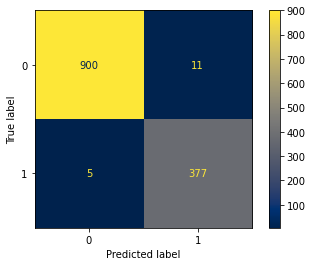

In [30]:
print_score(classifier8, train_vector.toarray(), train_data.label, test_vector.toarray(), test_data.label, train=True)
print_score(classifier8, train_vector.toarray(), train_data.label, test_vector.toarray(), test_data.label, train=False)

In [31]:
import joblib
joblib.dump(classifier8, 'EMSPMCLASS.pkl')

['EMSPMCLASS.pkl']

In [1]:
joblib.dump(vectorizer, 'vectorizer.pkl')

NameError: name 'joblib' is not defined